


## **Group 5 Names:**
1. Manoko Mokgokong

2. Blessing Ozoemena

3. Folashade Ojo

4. Rashidat Tajudeen

5. Maureen Okoli




## **Exploratory Data Analysis (EDA) and Churn Prediction Modeling**

# ***1. Introduction***



The Telco Customer Churn dataset contains information about a telecommunications company's customers and their subscription details. The main goal of this dataset is to predict customer churn, that is, the customers who leave the company and stopped using their services. Understanding the factors that contribute to customers leaving can help the company develop strategies to retain customers.

## ***1.1. Data Description***

This dataset contains the following features:

**customerID:** Unique identifier for each customer.

**Gender:** Gender of the customer (Male/Female).

**SeniorCitizen:** Indicates if the customer is a senior citizen (1 for Yes, 0 for No).

**Partner:** Indicates if the customer has a partner (Yes/No).

**Dependents:** Indicates if the customer has dependents, like children (Yes/No).

**tenure:** Number of months the customer has stayed with the company.

**PhoneService:** Indicates if the customer has a phone service (Yes/No).

**MultipleLines:** Indicates if the customer has multiple lines (No phone service, No, Yes).

**InternetService:** Type of internet service the customer has (DSL, Fiber optic, No).

**OnlineSecurity:** Indicates if the customer has online security (Yes/No/No internet service).

**OnlineBackup:** Indicates if the customer has online backup (Yes/No/No internet service).

**DeviceProtection:**Indicates if the customer has device protection (Yes/No/No internet service).

**TechSupport:** Indicates if the customer has tech support (Yes/No/No internet service).

**StreamingTV:** Indicates if the customer has streaming TV (Yes/No/No internet service).

**StreamingMovies:** Indicates if the customer has streaming movies (Yes/No/No internet service).

**Contract:** Type of contract the customer has (Month-to-month, One year, Two year).

**PaperlessBilling:** Indicates if the customer has paperless billing (Yes/No).

**PaymentMethod:** Payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges:** The amount charged to the customer monthly.

**TotalCharges:** The total amount charged to the customer.

**Churn:** Indicates if the customer have left the company (Yes/No).

#***2. Data Loading***





In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv ("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ***3. Exploratory Data Analysis***

## ***3.1 Data Overview***

In [ ]:
# Diplays the number of columns and rows of the dataset
df.shape

(7043, 21)

This dataset have 7043 rows and 21 columns

In [ ]:
#The first 5 rows of the dataset
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#The last five rows of the dataset
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.describe() # Display the basic stats about the dataset

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The dataset comprises 7043 entries with no missing values for the columns `SeniorCitizen`, `tenure`, and `MonthlyCharges`. The `SeniorCitizen` column indicates that 16.2% of the customers are senior citizens, with a standard deviation of 0.369, showing that most customers are not senior citizens, as reflected by the 75th percentile being 0. The `tenure` column shows an average customer tenure of approximately 32.37 months, with a standard deviation of 24.56, indicating substantial variation in how long customers stay. Tenure ranges from 0 to 72 months, with the median at 29 months. The `MonthlyCharges` column reveals an average monthly charge of 64.76 dollars, with a wide dispersion (standard deviation of 30.09) and charges spanning from 18.25 to 118.75 dollars. The 25th and 75th percentiles are 35.50 and 89.85 dollars, respectively, showing significant variability in monthly charges across the customer base.

In [ ]:
# Display the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking if the dataset have null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset have no null values

In [ ]:
df.duplicated().sum() # The number of duplicates in the dataset

0

There are no duplicates in the dataset

In [ ]:
#Changing the datatype of SeniorCitizen from int to object
df['SeniorCitizen']= df['SeniorCitizen'].astype('object')

The SeniorCitizen column represents a categorical variable with two possible values: 0 (not a senior citizen) and 1 (senior citizen). Even though these values are encoded as integers, they are not numerical data but categorical labels. Changing the datatype to object better reflects the categorical nature of this feature. Ultimately, this will ensure that it is correctly treated as a categorical variable during data analysis and modeling.

In [ ]:
#Changing the datatype of TotalCharges from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Converting TotalCharges from object to float ensures that the column is treated as a numerical feature, enabling accurate mathematical operations, statistical analysis, and compatibility with data visualization and machine learning tools.

In [ ]:
# Checking if the dataset have null values after changing the data type
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The TotalCharges column has 11 missing values, which are likely due to customers with a tenure of 0 (new customers). We can handle these missing values by dropping them. This is because they represent a very small proportion of the dataset (only 11 out of 7043 entries), and imputing them could introduce inaccuracies. Removing these rows ensures that the remaining dataset is complete and ready for analysis without significantly impacting the overall dataset size or introducing potential biases.

In [ ]:
#Dropping the null value because the missing values are little and they do not add any value/ are not of significance
df.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset has now become void of missing values

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


After changing the data types and removing missing values, the mean tenure has slightly increased from 32.37 to 32.42 months, while the standard deviation has remained almost unchanged. The minimum tenure is now 1 month, reflecting the removal of customers with 0 months tenure. The other percentile values (25%, median, 75%) and the maximum remain consistent.

Whereas, the mean and median monthly charges have slightly increased, but not significantly. The standard deviation and range (min to max) of monthly charges remain identical, indicating stable variability and distribution of monthly charges.

Latly, the Total charges column, which accumulate over the tenure, has an average of 2283.30 dollars with a substantial standard deviation of 2266.77 dollars, reflecting the cumulative effect of the varied tenures and monthly charges. The total charges span from 18.80 to 8684.80 dollars, with the 25th percentile at 401.45, the median at 1397.48, and the 75th percentile at 3794.74 dollars, indicating a broad distribution of the total amounts billed to customers over their service periods.

## ***3.2. Univariate Analysis***

###***3.2.1 Numerical features: Histograms to visualize the distribution of each numerical feature.***

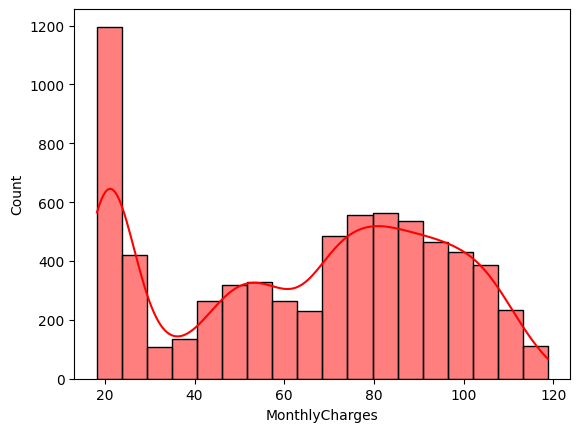

In [ ]:
# Distribution of Monthlycharges
sns.histplot(data=df, x=df["MonthlyCharges"], kde=True, color='r')
plt.show()

Monthly Charges are normally distributed with a peak around 20 - 25 which indicates that a significant number of customers are paying monthly charges within this range.The company might have a popular pricing plan around 20 - 25, which attracts a large number of customers. This could be a basic or entry-level plan that meets the needs of many customers.

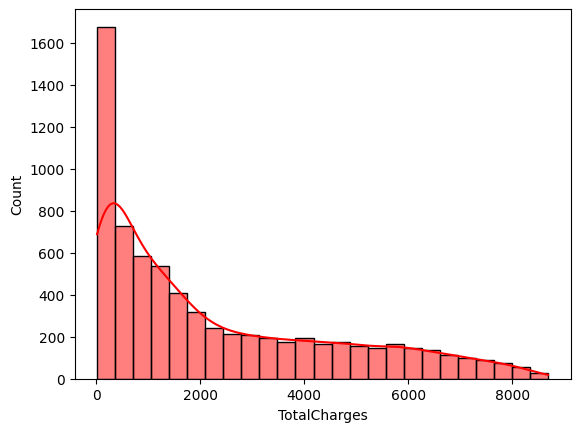

In [ ]:
# Distribution of TotalCharges
sns.histplot(data=df, x=df["TotalCharges"], kde=True, color='r')
plt.show()

Total charges have a right-skewed distribution, indicating that most customers have lower total charges.

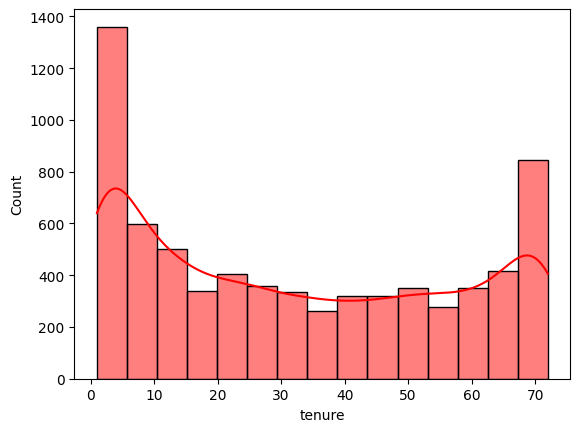

In [ ]:
# Distribution of tenure
sns.histplot(data=df, x=df["tenure"], kde=True, color='r')
plt.show()

The distribution of tenure is fairly uniform with some peaks at certain intervals. This indicates that customers have a wide range of tenure lengths with the company. The presence of customers with both short and long tenures could be that the company is able to attract new customers while also retaining existing ones.

##***3.2.2. Categorical features: Bar Plot to visualize the distrubition***

count     7032
unique       2
top          0
freq      5890
Name: SeniorCitizen, dtype: int64


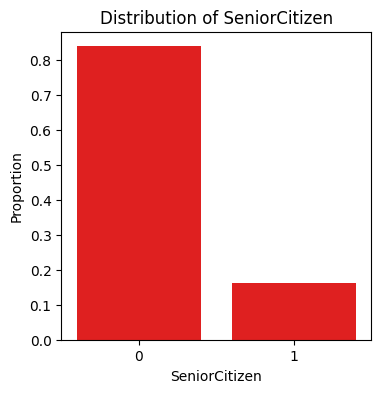

In [ ]:
# Distribution of the 'SeniorCitizen' column within our dataset, showing the propotion  for each category in the column
print(df['SeniorCitizen'].describe())
proportions = (df['SeniorCitizen'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Proportion')
plt.show()

About 84% of the customers are not senior citizens. Probably, the majority of the company's customer base is likely younger or middle-aged individuals.

count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object


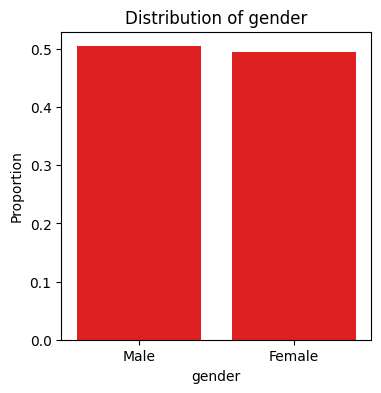

In [ ]:
# Distribution of the 'gender' column within our dataset, showing the propotion  for each category in the column
print(df['gender'].describe())
proportions = (df['gender'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Proportion')
plt.show()

The distribution between male and female customers is almost equal, with males at about 51% and females about 49%.

count     7032
unique       2
top         No
freq      3639
Name: Partner, dtype: object


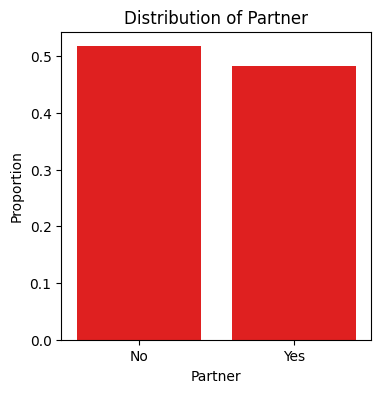

In [ ]:
# Distribution of the 'Partner' column within our dataset, showing the propotion  for each category in the column
print(df['Partner'].describe())
proportions = (df['Partner'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of Partner')
plt.xlabel('Partner')
plt.ylabel('Proportion')
plt.show()

The number of customers with and without partners are almost the same,

count     7032
unique       2
top         No
freq      4933
Name: Dependents, dtype: object


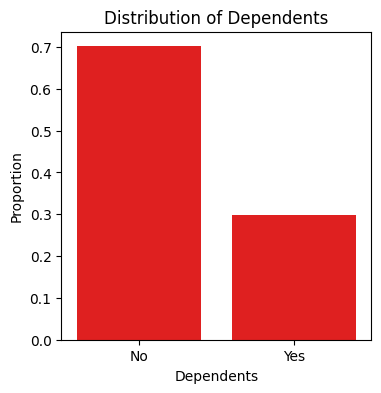

In [ ]:
# Distribution of the 'Dependents' column within our dataset, showing the propotion  for each category in the column
print(df['Dependents'].describe())
proportions = (df['Dependents'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Proportion')
plt.show()

70% of the customers do not have dependents which could likely mean their children

count     7032
unique       2
top        Yes
freq      6352
Name: PhoneService, dtype: object


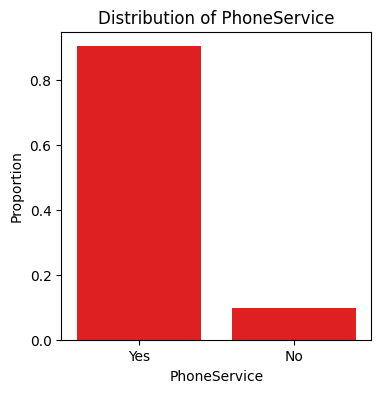

In [ ]:
# Distribution of the 'PhoneService' column within our dataset, showing the propotion  for each category in the column
print(df['PhoneService'].describe())
proportions = (df['PhoneService'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Proportion')
plt.show()

More than 80% of the customers have phone service

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object


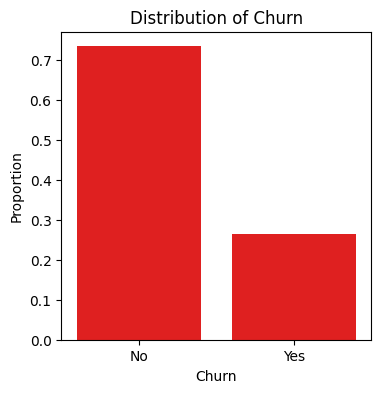

In [ ]:
# Distribution of the 'Churn' column within our dataset, showing the propotion  for each category in the column
print(df['Churn'].describe())
proportions = (df['Churn'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()

There is a noticeable number of customers who have churned.


count                 7032
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object


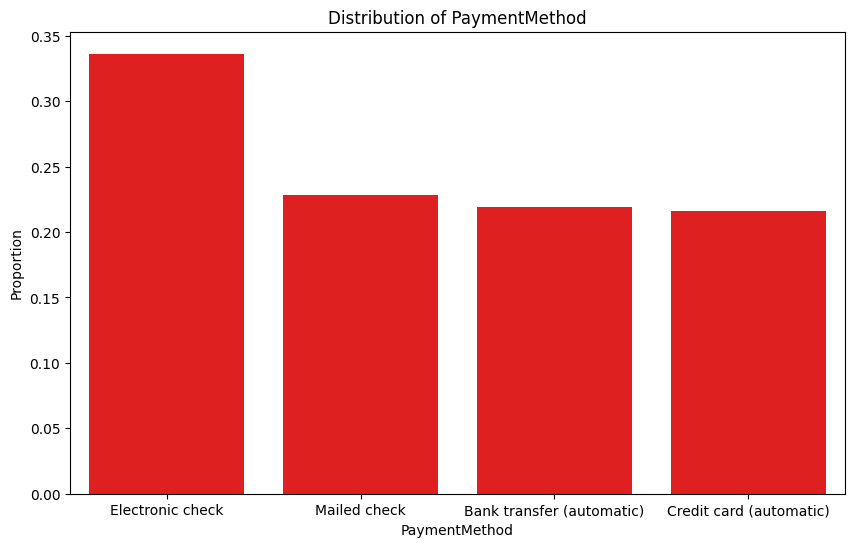

In [ ]:
# Distribution of the 'PaymentMethod' column within our dataset, showing the propotion  for each category in the column
print(df['PaymentMethod'].describe())
proportions = (df['PaymentMethod'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(10, 6))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Proportion')
plt.show()

There is a diverse distribution of payment methods, with electronic check being the most common. It could indicate that a significant portion of the customer base prefers or is more accustomed to digital transactions. This aligns with the majority users who are of the younger generation and are probably more tech savvy.

count     7032
unique       2
top        Yes
freq      4168
Name: PaperlessBilling, dtype: object


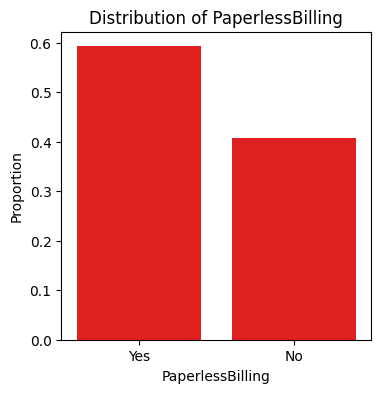

In [ ]:
# Distribution of the 'PaperlessBilling' column within our dataset, showing the propotion  for each category in the column
print(df['PaperlessBilling'].describe())
proportions = (df['PaperlessBilling'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Proportion')
plt.show()

A majority of the customers (about 55%) use paperless billing

count               7032
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object


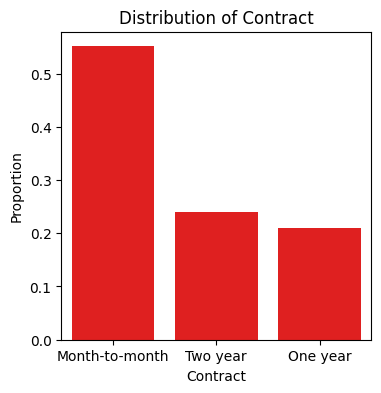

In [ ]:
# Distribution of the 'Contract' column within our dataset, showing the propotion  for each category in the column
print(df['Contract'].describe())
proportions = (df['Contract'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of Contract')
plt.xlabel('Contract')
plt.ylabel('Proportion')
plt.show()

Most customers are on a month to month contract with about 55%

count     7032
unique       3
top         No
freq      2781
Name: StreamingMovies, dtype: object


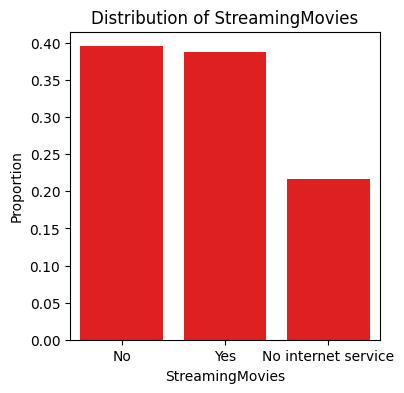

In [ ]:
# Distribution of the 'StreamingMovies' column within our dataset, showing the propotion  for each category in the column
print(df['StreamingMovies'].describe())
proportions = (df['StreamingMovies'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Proportion')
plt.show()

A significant number of customers do not have streaming movies services with 39%.


count     7032
unique       3
top         No
freq      2809
Name: StreamingTV, dtype: object


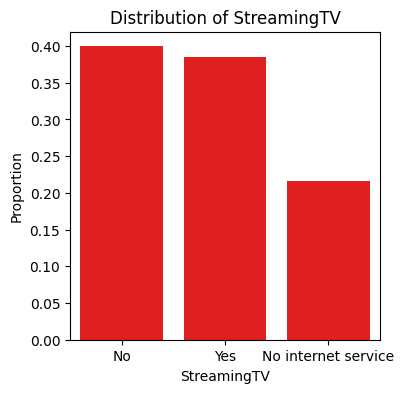

In [ ]:
# Distribution of the 'StreamingTV' column within our dataset, showing the propotion  for each category in the column
print(df['StreamingTV'].describe())
proportions = (df['StreamingTV'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Proportion')
plt.show()

About 40% of the customers do not have streaming TV services  

count     7032
unique       3
top         No
freq      3472
Name: TechSupport, dtype: object


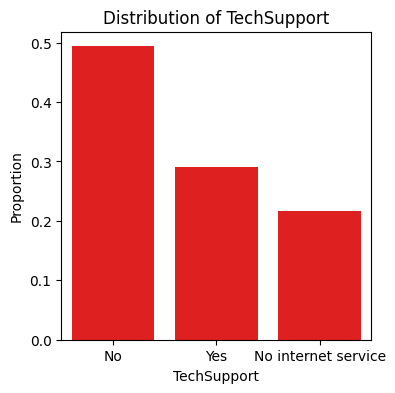

In [ ]:
# Distribution of the 'TechSupport' column within our dataset, showing the propotion  for each category in the column
print(df['TechSupport'].describe())
proportions = (df['TechSupport'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Proportion')
plt.show()

A large proportion of 49% do not have tech support

count     7032
unique       3
top         No
freq      3094
Name: DeviceProtection, dtype: object


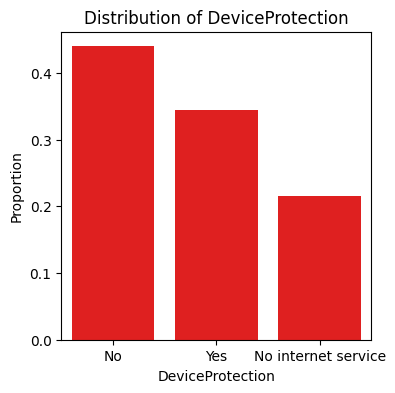

In [ ]:
# Distribution of the 'DeviceProtection' column within our dataset, showing the propotion  for each category in the column
print(df['DeviceProtection'].describe())
proportions = (df['DeviceProtection'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Proportion')
plt.show()

Many customers of about 45% do not have device protection

count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object


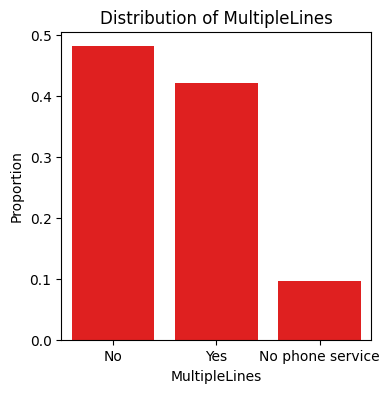

In [ ]:
# Distribution of the 'MultipleLines' column within our dataset, showing the propotion  for each category in the column
print(df['MultipleLines'].describe())
proportions = (df['MultipleLines'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Proportion')
plt.show()

Many customers (48%) do not have multiple lines.



count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


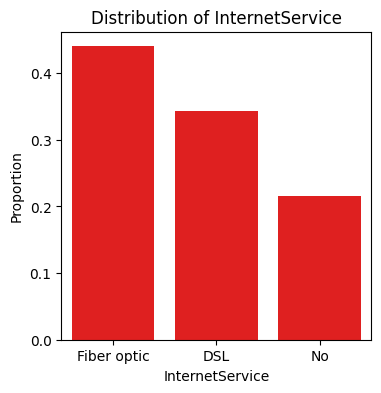

In [ ]:
# Distribution of the 'InternetService' column within our dataset, showing the propotion  for each category in the column
print(df['InternetService'].describe())
proportions = (df['InternetService'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Proportion')
plt.show()

The majority of customers have either DSL (35%) or Fiber optic (45%) internet service.


count     7032
unique       3
top         No
freq      3497
Name: OnlineSecurity, dtype: object


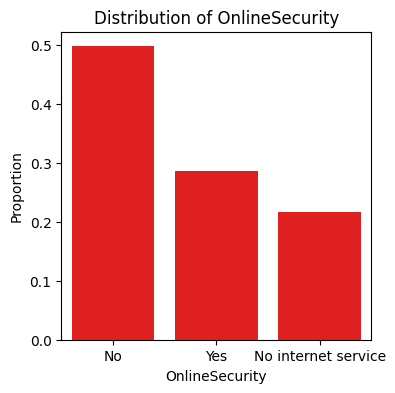

In [ ]:
# Distribution of the 'OnlineSecurity' column within our dataset, showing the propotion  for each category in the column
print(df['OnlineSecurity'].describe())
proportions = (df['OnlineSecurity'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Proportion')
plt.show()

Approximately half of the customers with 49.8% do not have online security

count     7032
unique       3
top         No
freq      3087
Name: OnlineBackup, dtype: object


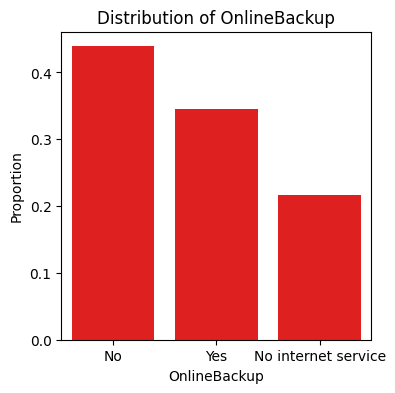

In [ ]:

# Distribution of the 'OnlineBackup' column within our dataset, showing the propotion  for each category in the column
print(df['OnlineBackup'].describe())
proportions = (df['OnlineBackup'].value_counts(normalize=True))

# Create a bar plot using the proportions
plt.figure(figsize=(4, 4))
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Proportion')
plt.show()

A significant number of about 45% of the customers do not use online backup services.

## ***3.3. Bivariate Analysis***



### ***3.3.1.Numeric Features***

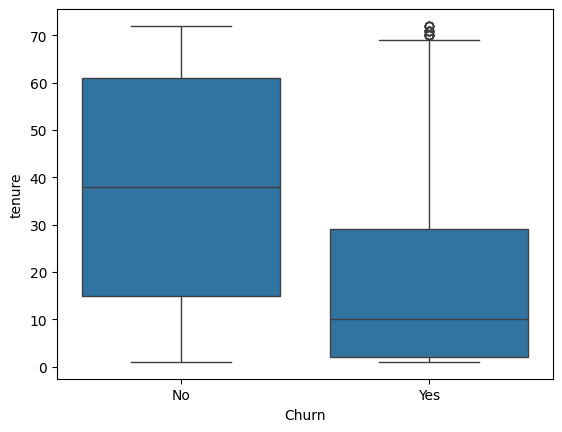

In [ ]:
# Boxplot for Churn VS tenure
sns.boxplot(x="Churn", y='tenure', data= df)
plt.show()

Looking at the ‘No Churn’ group, we can see that the median tenure is around 30 months, with the middle 50% of the data falling between roughly 10 and 50 months. There are a few outliers on the high end, with the maximum tenure exceeding 70 months.

The ‘Yes Churn’ group has a similar median tenure of around 30 months, however the data appears to be more spread out. The box is larger, indicating that the middle 50% of the data ranges from about 5 to 70 months. There are also more outliers in this group, with a few data points exceeding 70 months.

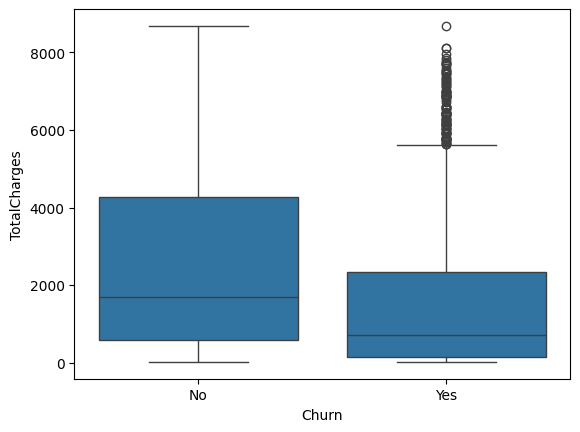

In [ ]:
# Boxplot for Churn VS TotalCharges
sns.boxplot(x="Churn", y='TotalCharges', data= df)
plt.show()

The box plot shows that the total charges are higher for the churn group than the no churn group. The median total charge for the churn group is around 6000, while the median total charge for the no churn group is around 2,000. The IQR is also larger for the churn group, which showing that there is more spread in the data for this group. There are also some outliers in the churn group, which are represented by the points beyond the whiskers.

The box plot shows that there is a positive relationship between total charges and customer churn. Customers with higher total charges are more likely to churn than customers with lower total charges.

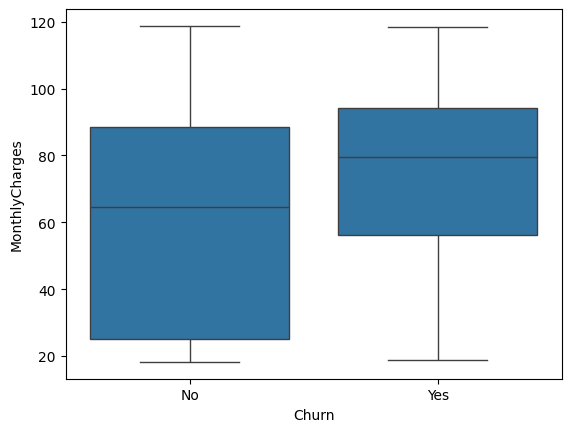

In [ ]:
# Boxplot for Churn VS MonthlyCharges
sns.boxplot(x="Churn", y='MonthlyCharges', data= df)
plt.show()

The median monthly charge for churned customers (Yes Churn) is slightly higher than that of non-churned customers (No Churn). This indicates that there may be a correlation between higher monthly charges and customer churn.

The box plot also shows that the distribution of monthly charges is wider for churned customers. This means that there is a greater range of monthly charges among customers who churn compared to those who don’t. There are also more outliers in the ‘Yes Churn’ group, which could indicate that some churned customers had very high monthly charges.

### ***3.3.2.Categorical Features***

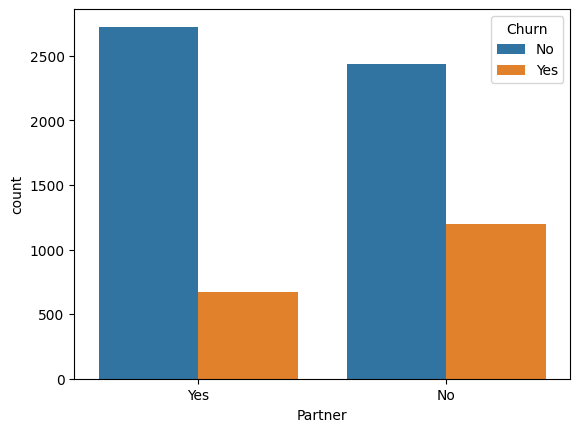

In [ ]:
#Count plot for Churn VS Partner
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

A higher proportion of customers who churned do not have a partner (around 1750 vs 750).

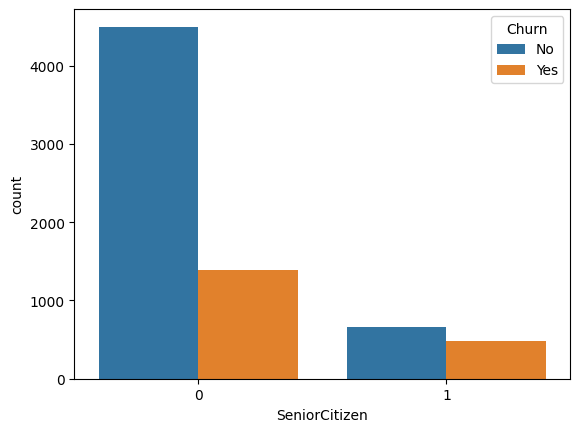

In [ ]:
#Count plot for Churn VS SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

There are significantly more senior citizens who haven't churned (remained subscribed) compared to those who churned (stopped subscribing) (around 750 vs 450).

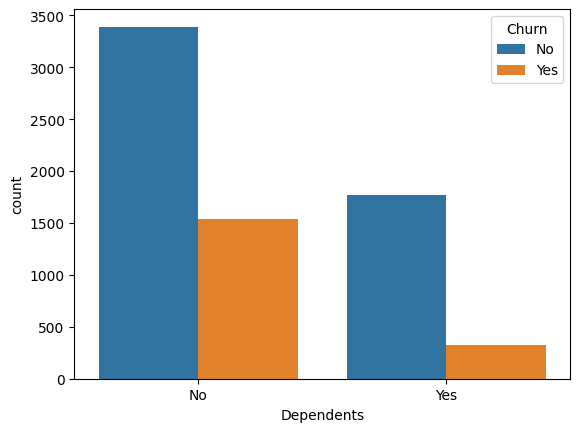

In [ ]:
#Count plot for Churn VS Dependents
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

Lot of customers of about 3000 who have no dependets have did not churn as compared to those that have dependents (1800)

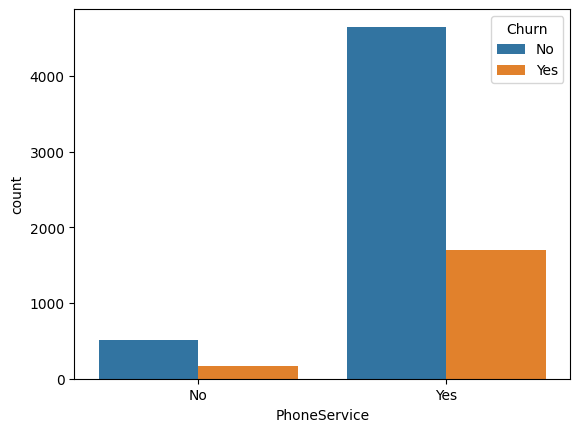

In [ ]:
#Count plot for Churn VS PhoneService
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()

Lot of customers who have phone services we more likely to not churn (4700) as compared to those who did not have (450)

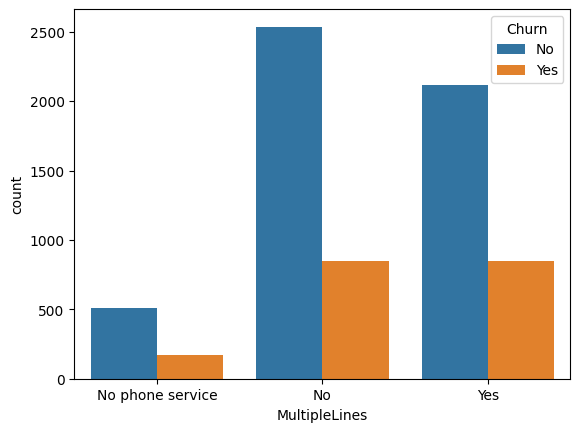

In [ ]:
#Count plot for Churn VS MultipleLines
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.show()

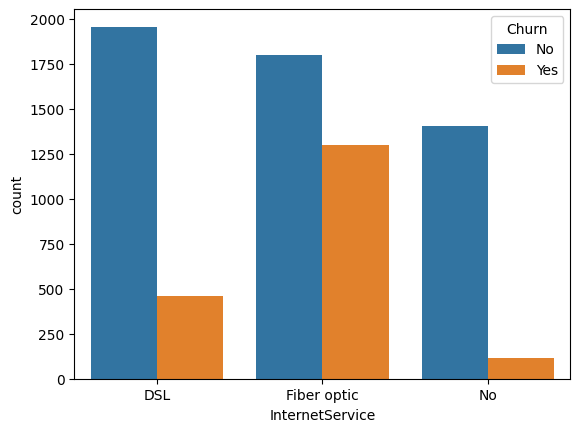

In [ ]:
#Count plot for Churn VS InternetService
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

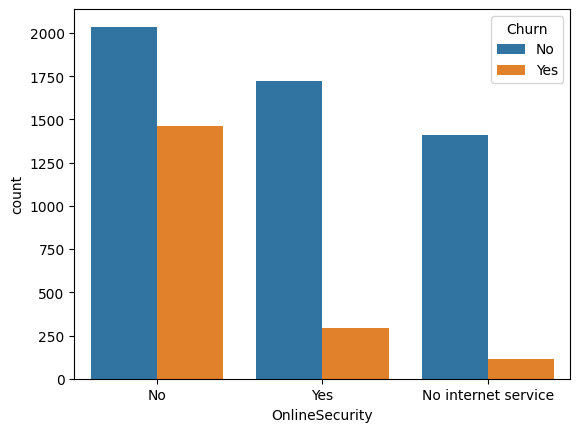

In [ ]:

#Count plot for Churn VS OnlineSecurity
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.show()

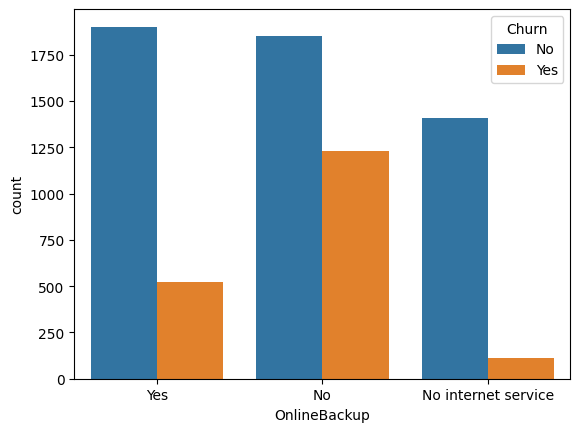

In [ ]:
#Count plot for Churn VS OnlineBackup
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.show()

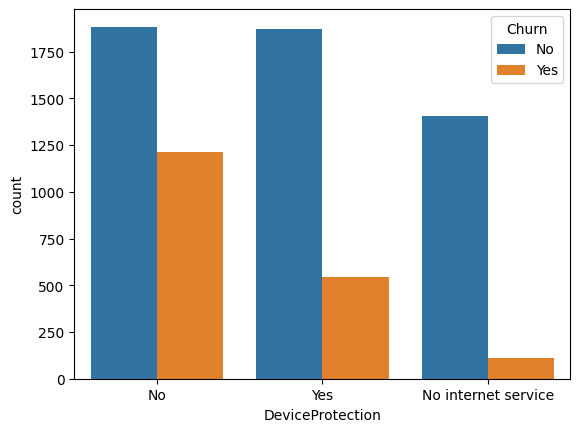

In [ ]:
#Count plot for Churn VS DeviceProtection
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.show()

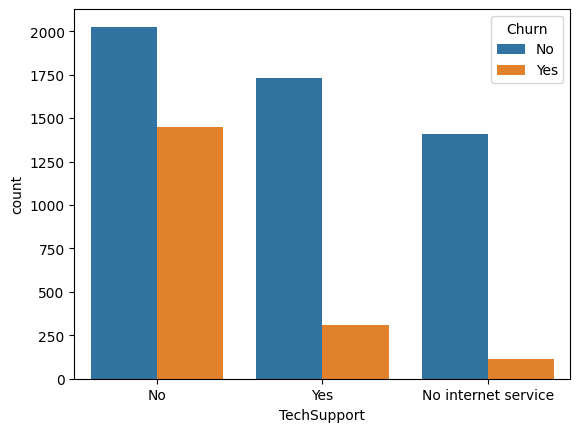

In [ ]:
#Count plot for Churn VS TechSupport
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.show()

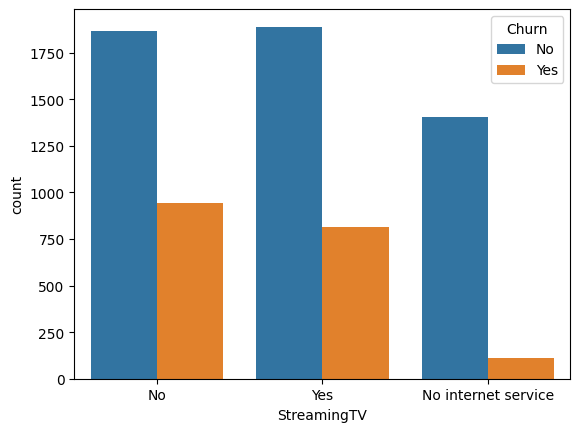

In [ ]:
#Count plot for Churn VS StreamingTV
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.show()

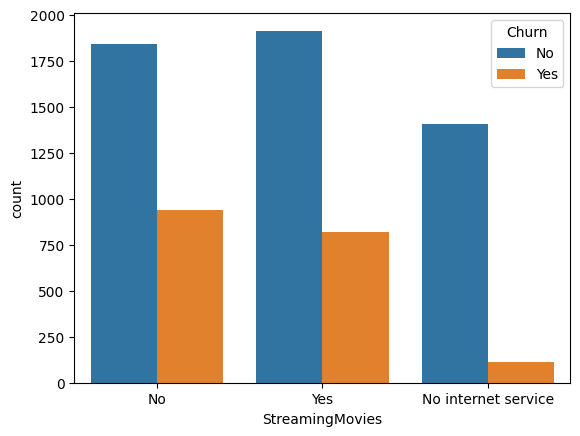

In [ ]:
#Count plot for Churn VS StreamingMovies
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.show()

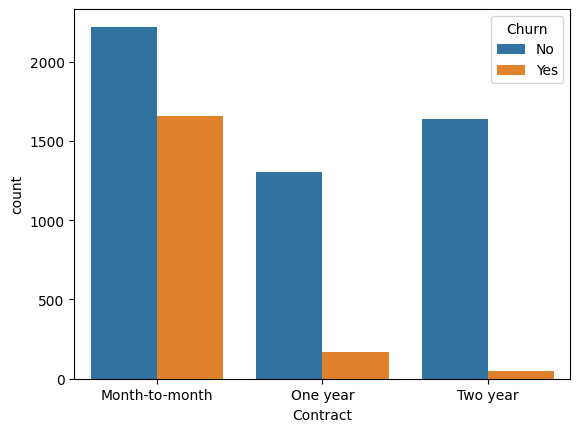

In [ ]:
#Count plot for Churn VS Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

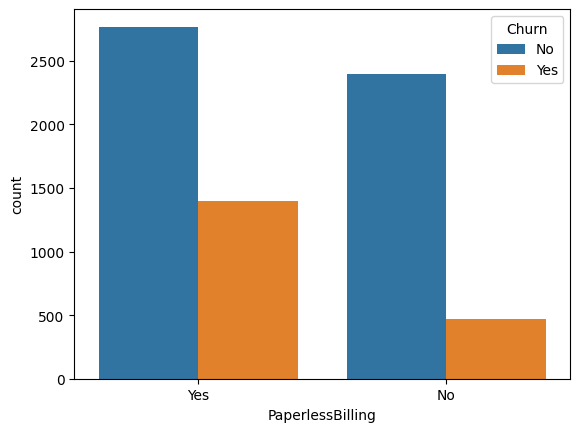

In [ ]:
#Count plot for Churn VS PaperlessBilling
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

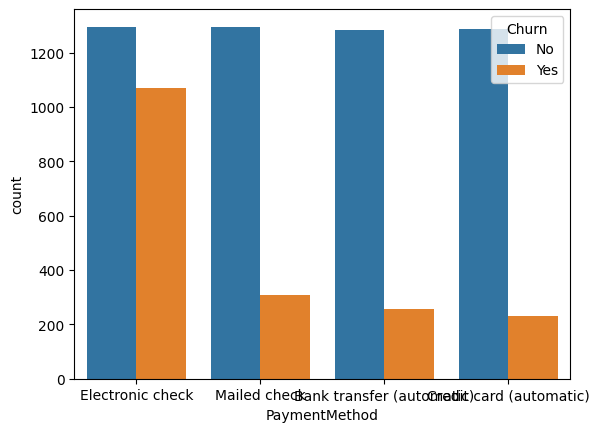

<Figure size 600x500 with 0 Axes>

In [ ]:
#Count plot for Churn VS PaymentMethod
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.figure(figsize=(6, 5))
plt.show()

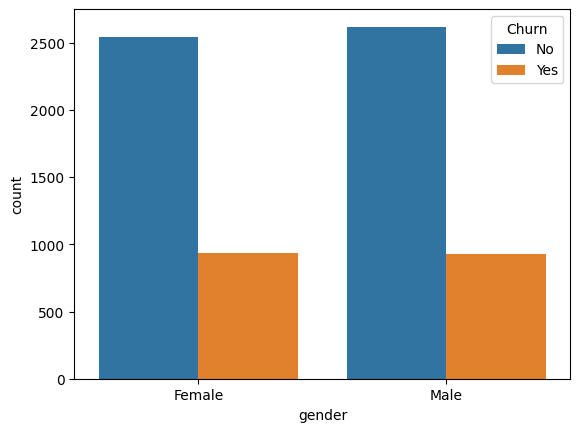

In [ ]:
#Count plot for Churn VS gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()


## ***4. Correlation Analysis***

In [ ]:
# Computing the correlation matrix to understand the relationships between numerical features.

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


there is a strong positive correlation (0.83) between tenure and total charges, implying that as tenure increases, total charges tend to rise as well, a logical outcome given the accumulation of charges over time. Additionally, there is a weaker positive correlation (0.25) between tenure and monthly charges, showing that while there is some relationship between tenure and monthly charges, it is not as pronounced as with total charges. Furthermore, there exists a moderate positive correlation (0.65) between monthly charges and total charges, indicating that customers with higher monthly charges tend to accumulate higher total charges

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

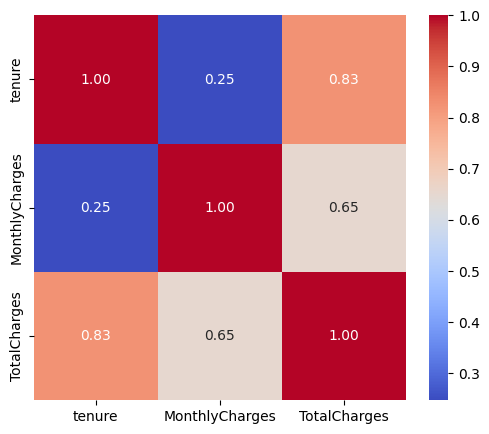

In [ ]:
#Creating heatmap to visualize the correlation matrix

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Generating a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


There is a strong positive correlation (0.83) between tenure and total charges, indicating that as customers stay longer with the service, their total charges increase accordingly. This could be due to loyalty programs or additional services acquired over time. Secondly, there is a moderate positive correlation (0.65) between monthly charges and total charges, showing that customers with higher monthly charges tend to have higher total charges. This could imply that customers who opt for premium services or packages end up spending more overall. Lastly, the correlation between tenure and monthly charges is weaker (0.25), indicating that while there is some association between how long a customer has been with the service and their monthly charges, it is not as strong as the correlation with total charges.

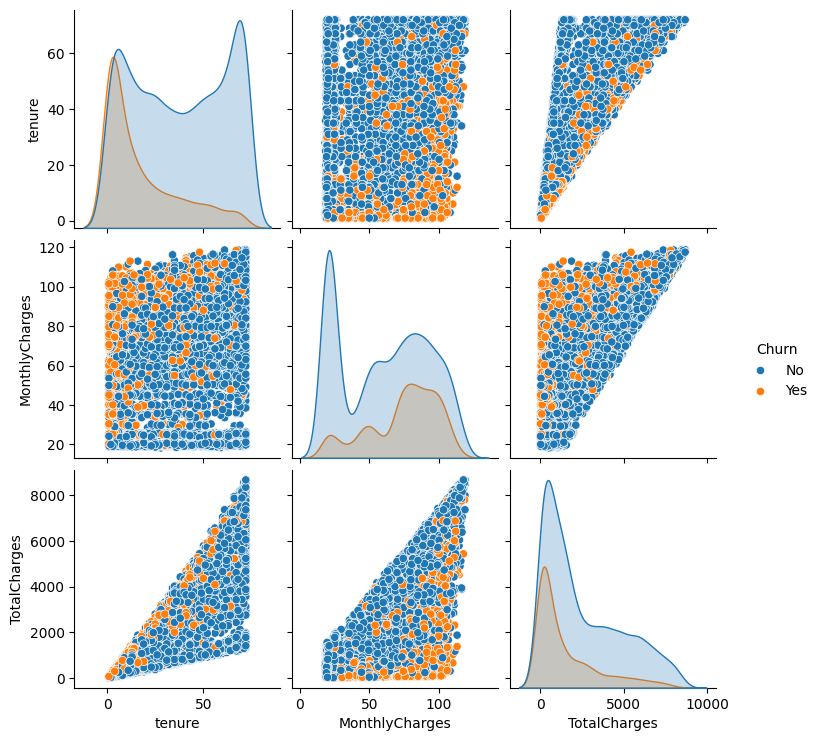

In [ ]:
# Feature to Feature distribution with the hue parameter as Churn
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.show()

Those who have stayed in the company for 50 months or more with low totalcharges and monthly charges are most likely to stay in the company

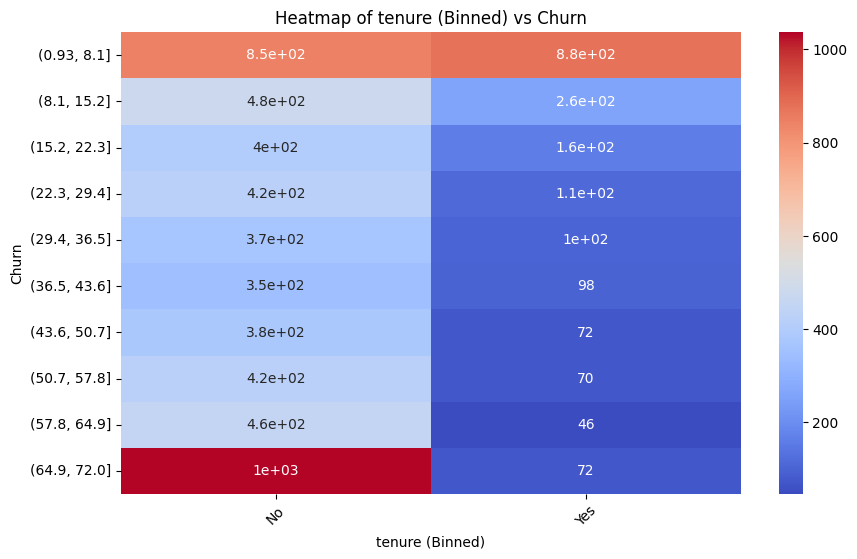

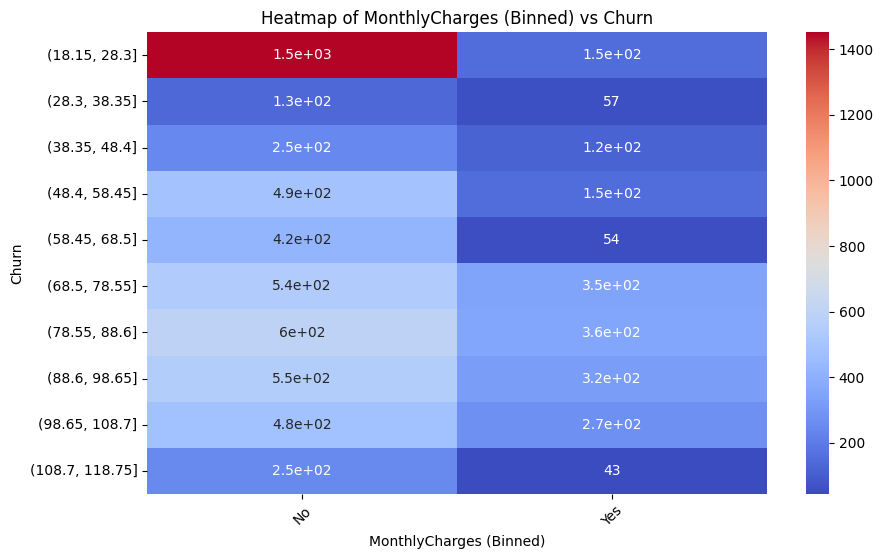

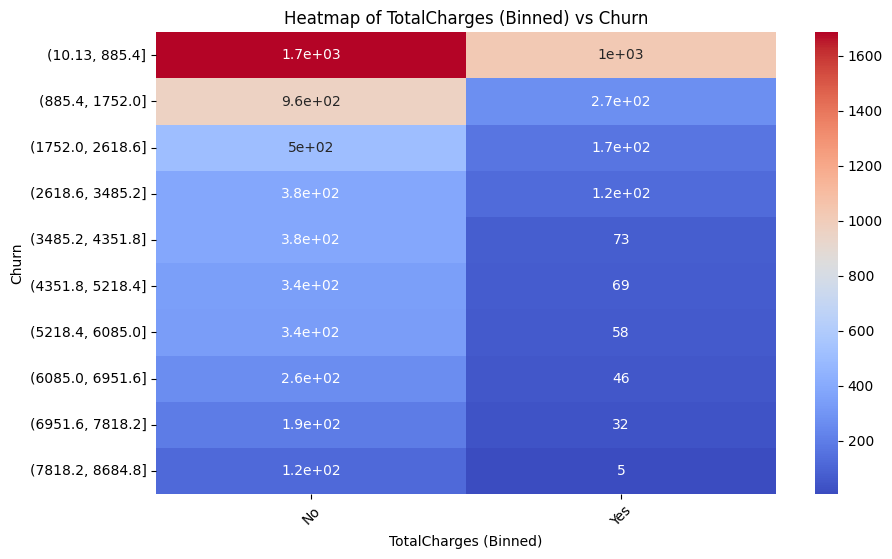

In [ ]:
# Define the number of bins for each numerical feature
num_bins = 10

# Define the target variable
target_variable = 'Churn'

# Group numerical features into bins
for feature in numerical_features:
    df[f'{feature}_bin'] = pd.cut(df[feature], bins=num_bins, precision=2)

# Create a heatmap for each binned numerical feature against the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    crosstab_data = pd.crosstab(df[f'{feature}_bin'], df[target_variable])
    sns.heatmap(crosstab_data, annot=True, cmap="coolwarm")
    plt.xlabel(f'{feature} (Binned)')
    plt.ylabel(target_variable)
    plt.title(f'Heatmap of {feature} (Binned) vs {target_variable}')
    plt.xticks(rotation=45)
    plt.show()

# Remove the binned features from the dataframe
df = df.drop([f'{feature}_bin' for feature in numerical_features], axis=1)


The heatmap shows the distribution of tenure, monthly charges and total charges for churned and non-churned customers.  The x-axis represents the tenure,monthly charges and total caheges binned into ten (10) equal intervals. The y-axis shows whether the customer churned (Yes or No).

For tenure, the cell in the bottom left corner labeled "(0.93, 8.1]" and "No" shows that there are roughly 85,000 customers whose tenure falls between 0.93 and 8.1 years and who did not churn. Thus, the heatmap shows a weak negative correlation between tenure and churn because there appears to be a higher concentration of churned customers in the lower tenure bins (shorter lengths of service) and a higher concentration of non-churned customers in the higher tenure bins (longer lengths of service). This shows that customers who are with the company for a longer period of time are less likely to churn.

For Monthly charges column, there are more customers who did not churn and have a monthly charge between 48.4 and $58.45 than any other category and there are about 400 customers with monthly charges between 108.7 and 118.75 dollars who did not churn, with  roughly 15,000 customers whose monthly charges fall between 18.15 and 28.30 dollars who did not churn.Additionally, the greatest number of customers falls in the 48.40 to 58.45 dollars bin, regardless of whether they churned or not and there are very few customers who churned who have monthly charges above 98.65 dollars. Overall, the heatmap does not reveal a strong correlation between the monthly charges and customer churn. There are churned customers across all monthly charge bins, and there are non-churned customers across all monthly charge bins as well. This shows that monthly charges alone are not a significant predictor of whether a customer will churn.

For Total charges, there are more customers who did not churn (around 1700) than those who churned (around 100)  with total charges between 10.13 and 885.4 dollrs. Overall, the heatmap does not reveal a strong correlation between the total charges and customer churn. There are churned customers across all total charge bins, and there are non-churned customers across all total charge bins as well. This shows that total charges alone are not a significant predictor of whether a customer will churn.

## ***5. Data Preprocessing***

In [ ]:
# Defining the categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical values of the varibales
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Revisting the modified dataframe's first ten rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  
 17  

# ***6. Modelling***

## ***6.1 Training the Model***

We split the data in 80:20 as this ensures that the model has enough data to learn from while also providing an independent dataset to evaluate its performance.This evaluation helps to assess metrics such as accuracy, precision, recall, and F1-score, providing insights into the model's predictive capabilities. Additionally, the 80-20 split helps to avoid overfitting by striking a balance between having enough data for training and testing,ensuring that the model generalizes well to new, unseen data

In [ ]:
# Storing the features in X and the target values in y
X = df.iloc[:, 1:19]
y = df.iloc[:,20 ]

# Splitting the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Assigning the Decision Tree Classfier instance to a variable
model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Training the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Testing the model by predicting the y values of the X test data
y_pred = model.predict(X_test)

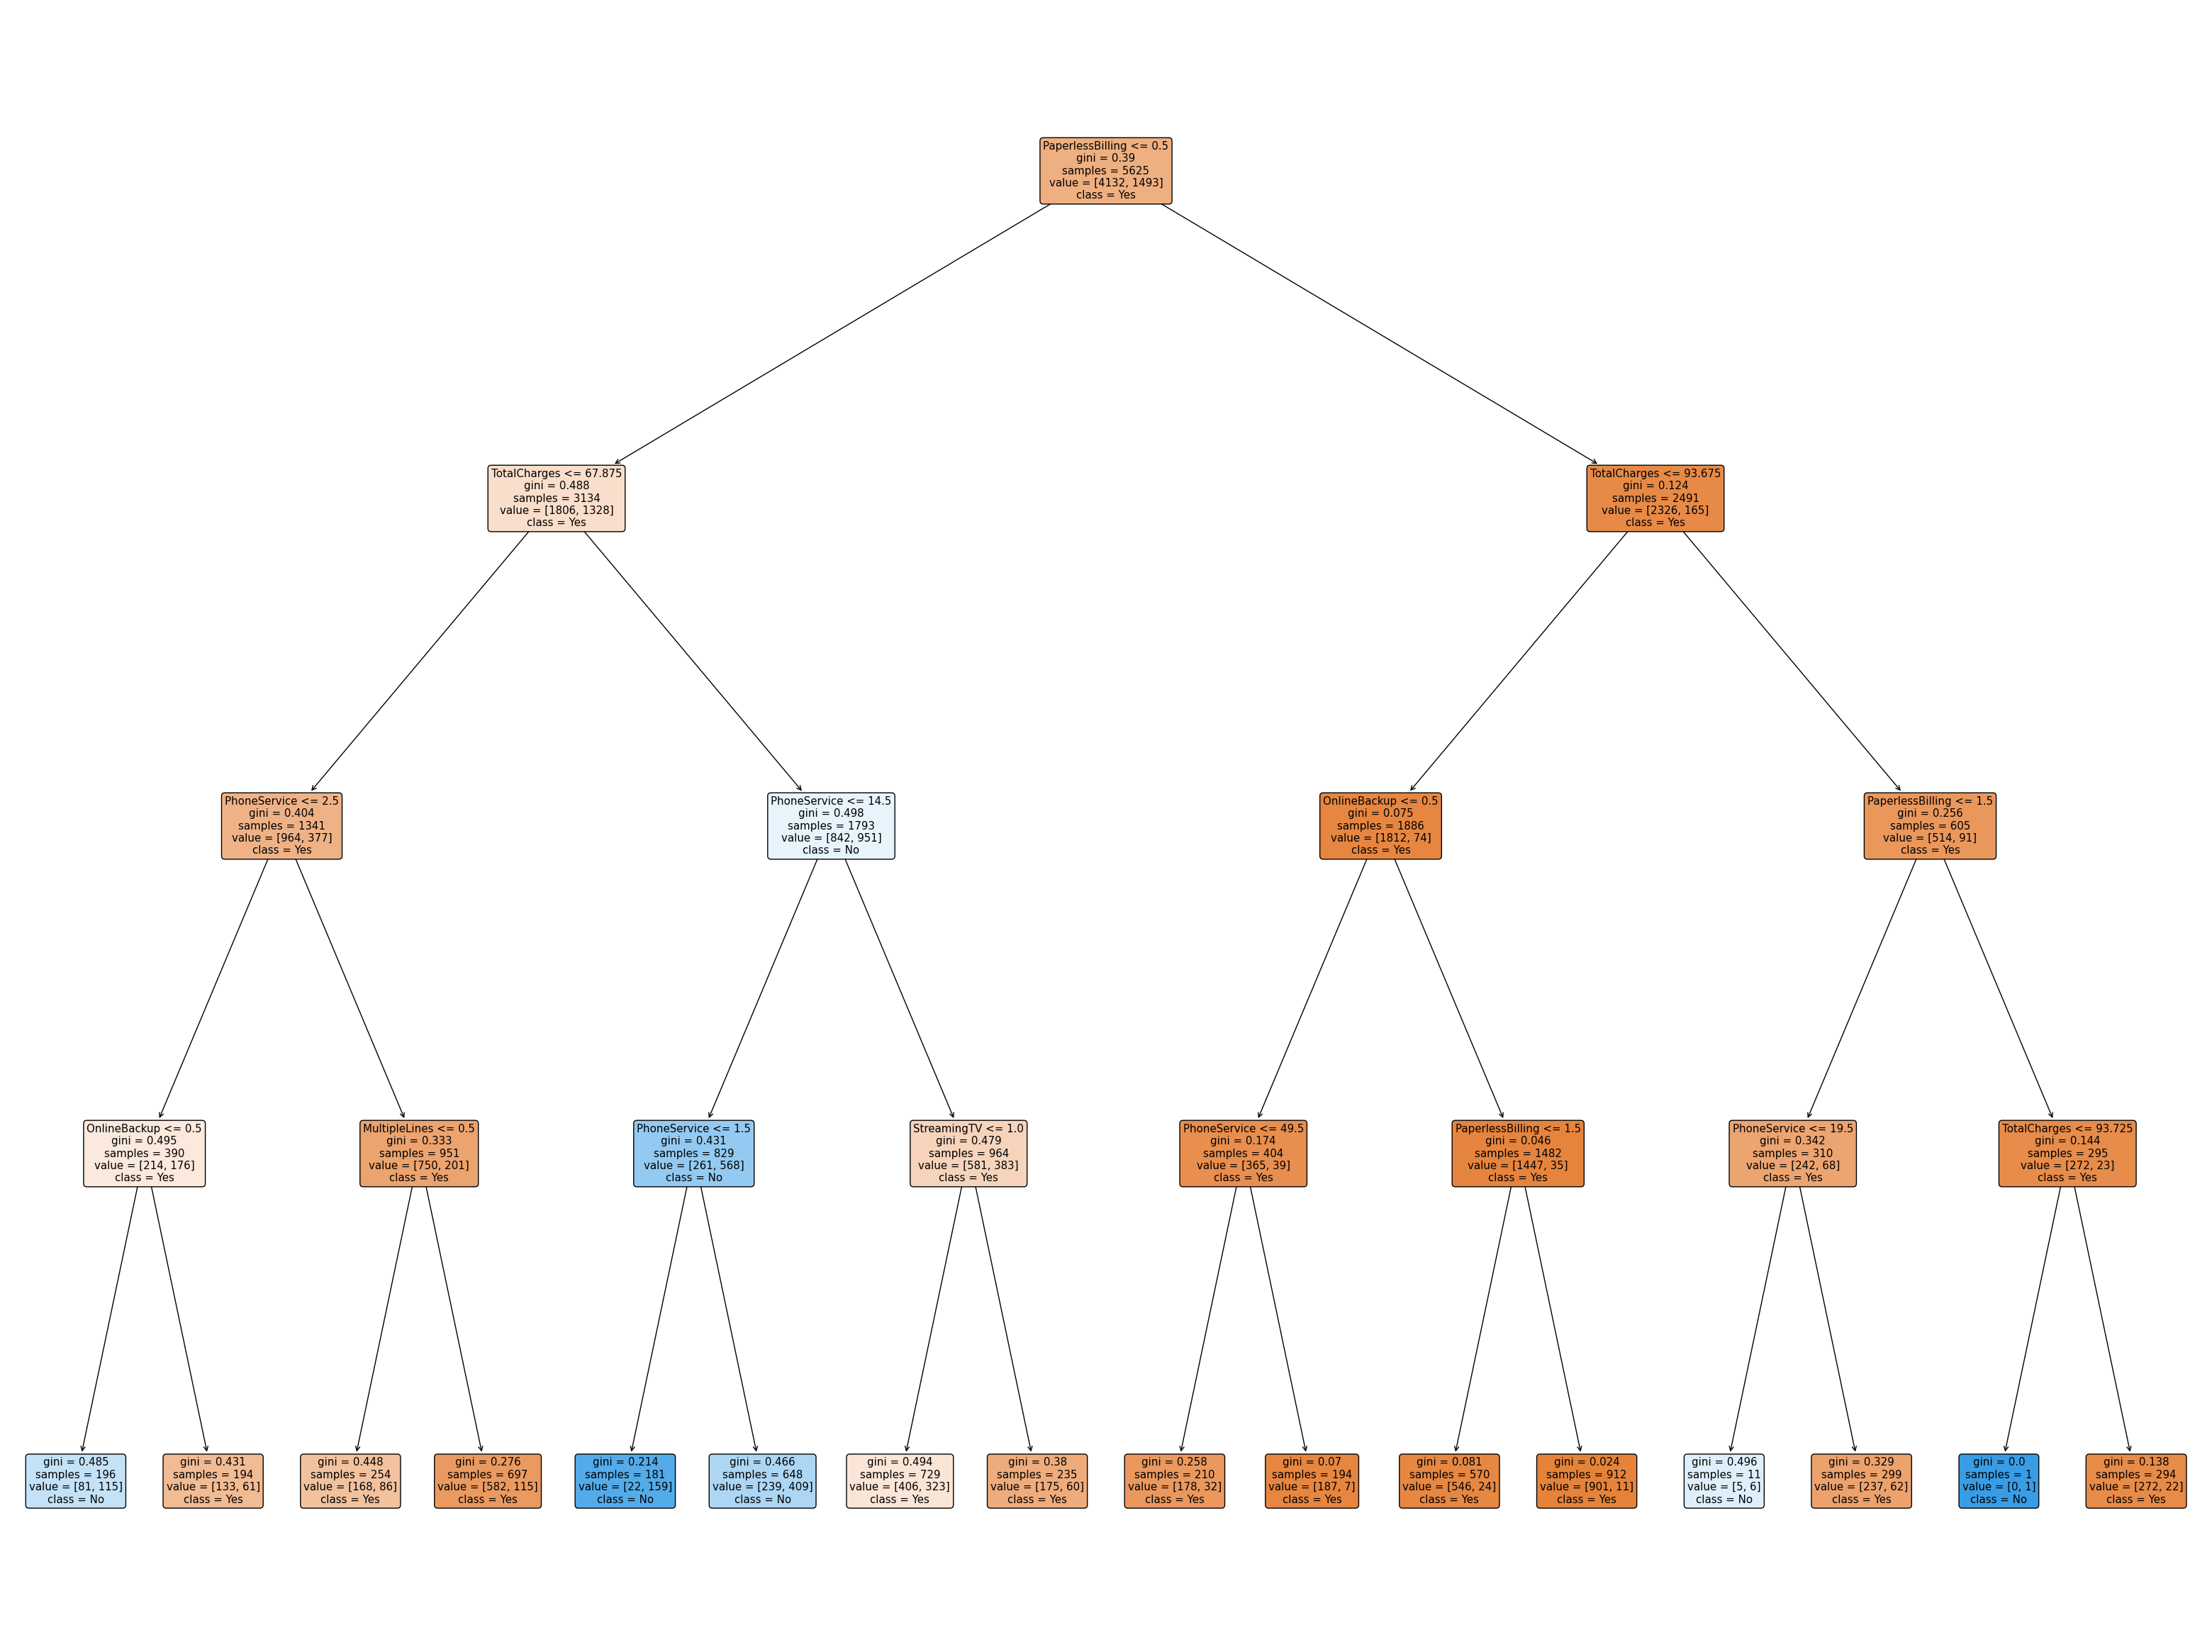

In [ ]:
feature_names = ['gender','tenure', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','MonthlyCharges','TotalCharges']
plt.figure(figsize=(40,30))
tree.plot_tree(model,feature_names=feature_names, class_names=['Yes', 'No'],filled=True,rounded=True)
plt.show()

Monthly charges appear lower in the branches without churn. This shows that churn is more likely for customers who pay less. This might seem counter-intuitive, but it could be that low-paying customers are less invested in the service and so more likely to churn.
Online security features seem to play a role in churn for customers with dependents. Customers with no online security features are more likely to churn in this group.

Customers with lower monthly charges are then split based on their ‘Contract type’. Customers with a ‘Contract’ are less likely to churn than those on a ‘Month-to-month’ plan

## ***6.2 Model Evaluation***

In [ ]:
# Creating a model performance report for the Decision Tree Model
Model_performance = classification_report(y_test, y_pred)
print(f"The report for the Decision Tree Model: \n{Model_performance}\n")

The report for the Decision Tree Model: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1031
           1       0.63      0.44      0.52       376

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407




In the evaluation report for the Decision Tree Model, we focus on precision, recall, and F1-score, which are essential metrics in assessing the model's predictive power for churn prediction. Precision reflects the proportion of correctly identified positive cases out of all cases predicted as positive. With a precision of 0.82 for non-churning customers (class 0) and 0.63 for churning customers (class 1), we observe satisfactory precision levels, particularly for predicting non-churning instances.

On the other hand, recall measures the proportion of correctly identified positive cases out of all actual positive cases. Here, the model shows strong recall for non-churning customers (class 0) with a score of 0.91, indicating that it effectively captures the majority of non-churning instances. However, the recall for churning customers (class 1) is lower at 0.44, indicating that the model misses a considerable portion of actual churning instances.

F1-score, the provides us with a balanced view of the model's overall performance. The F1-score for non-churning customers (class 0) is 0.86, reflecting a good balance between precision and recall. However, for churning customers (class 1), the F1-score drops to 0.52, indicating that the model's performance in identifying churning instances needs improvement.

In addition to these metrics, the overall accuracy of the model is reported as 0.78, suggesting that it correctly predicts churn for 78% of the customers in the dataset.

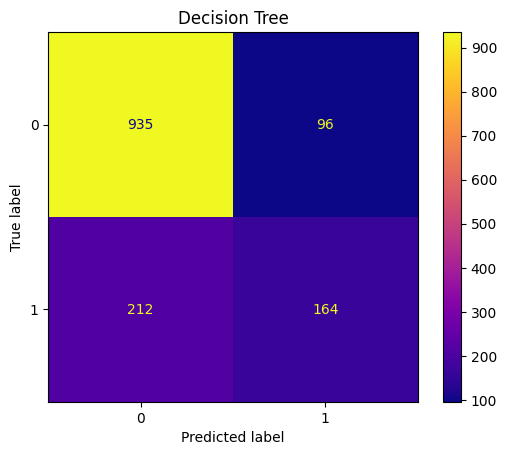

In [ ]:
# Creating a confusion matrix for the Decision Tree Model
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title('Decision Tree')
disp.ax_.grid(False)
plt.show()

he model seems to perform well on predicting class 0 (935 correct predictions) but less well on predicting class 1 (700 correct predictions). There were 96 instances where the model classified class 0 even though it actually belonged to class 1 and 164 instances where it classified class 1 when it actually belonged to class 0.

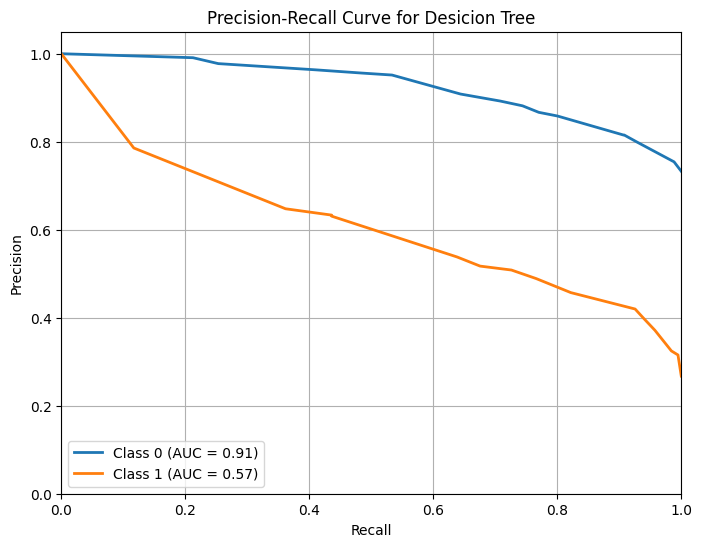

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model

y_pred = model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The precision-recall curve for class 0 (AUC = 0.91) is higher than the precision-recall curve for class 1 (AUC = 0.57). This means that the model is better at classifying class 0 than class 1.
For class 0, the model has a high precision at the expense of recall. This means that the model is good at identifying positive cases for class 0, but it may miss some actual positive cases.
For class 1, the model has a low precision and recall. This means that the model is not very good at identifying positive cases for class 1, and it may also identify some negative cases as positive.

## ***6.3. Hyperparameter Tuning***

In [ ]:
# Creating a parameter grid to try and improve the Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
# First technique is using a grid search with 5 cross validation folds to tune the model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Training the model to tune
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [ ]:
# Second technique is using a randomized search with 5 cross validation folds
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Training the model to tune
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [ ]:
# Recover the tuned Decision Tree models with the best parameters
gridSearch_model = grid_search.best_estimator_
randomSearch_model = random_search.best_estimator_

# Testing the tuned Decision Tree models by predicting the y values of the X test data
y_pred_tuned1 = gridSearch_model.predict(X_test)
y_pred_tuned2 = randomSearch_model.predict(X_test)

### ***6.4. Model Evaluation After Tuning the Model***

In [ ]:
# Creating a model performance report for the Decision Tree Model Tuned With Grid Search CV
Model_performance = classification_report(y_test, y_pred_tuned1)
print(f"The report for the Decision Tree Model Tuned With Grid Search CV: \n{Model_performance}\n")

# Creating a model performance report for the Decision Tree Model Tuned With Randomized Search CV
Model_performance = classification_report(y_test, y_pred_tuned2)
print(f"The report for the Decision Tree Model Tuned With Randomized Search CV: \n{Model_performance}")

The report for the Decision Tree Model Tuned With Grid Search CV: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1031
           1       0.58      0.45      0.51       376

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407


The report for the Decision Tree Model Tuned With Randomized Search CV: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1031
           1       0.58      0.45      0.51       376

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



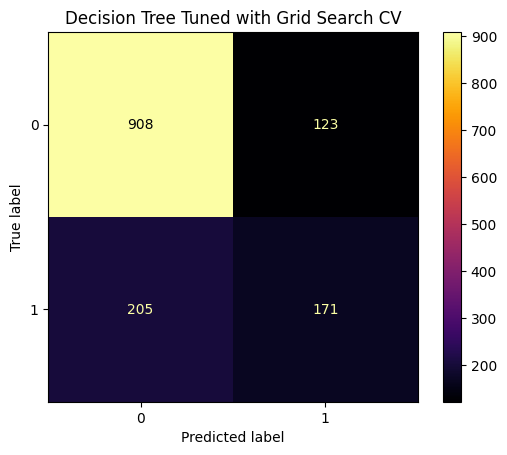

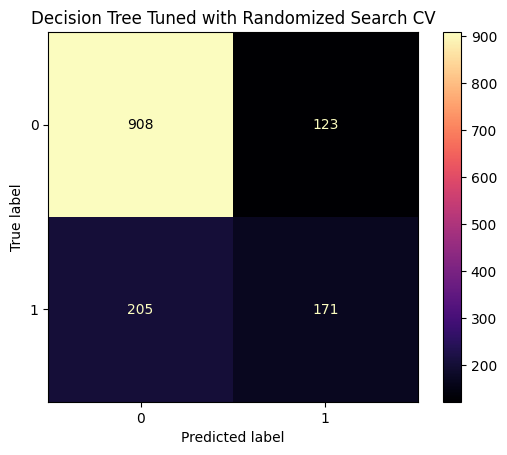

In [ ]:
# Creating a confusion matrix for the Decision Tree Model Tuned with Grid Search CV
cm1 = confusion_matrix(y_test, y_pred_tuned1, labels=gridSearch_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=gridSearch_model.classes_)
disp.plot(cmap=plt.cm.inferno)
plt.title('Decision Tree Tuned with Grid Search CV')
disp.ax_.grid(False)
plt.show()

# Creating a confusion matrix for the Decision Tree Model Tuned with Randomized Search CV
cm2 = confusion_matrix(y_test, y_pred_tuned2, labels=randomSearch_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=randomSearch_model.classes_)
disp.plot(cmap=plt.cm.magma)
plt.title('Decision Tree Tuned with Randomized Search CV')
disp.ax_.grid(False)
plt.show()

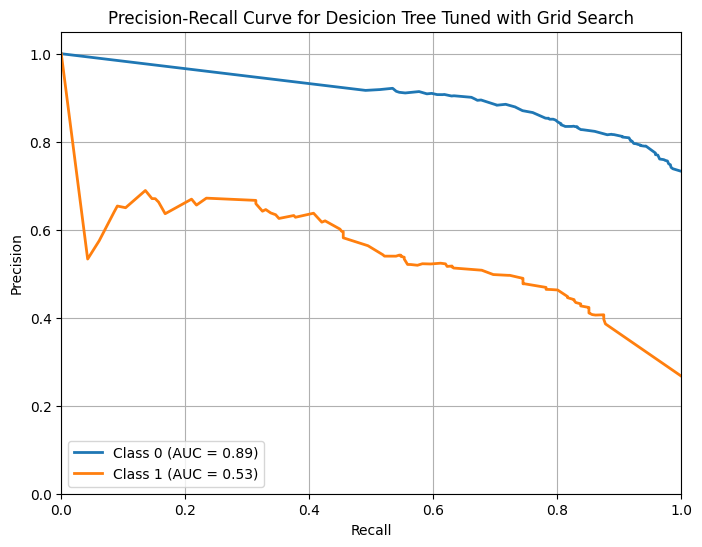

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model Tuned with Grid Search CV

y_pred_tuned1 = gridSearch_model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(gridSearch_model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_tuned1[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred_tuned1[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree Tuned with Grid Search')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The AUC for class 0 decresed by 0,2 while for class 1 it increased by 0.2

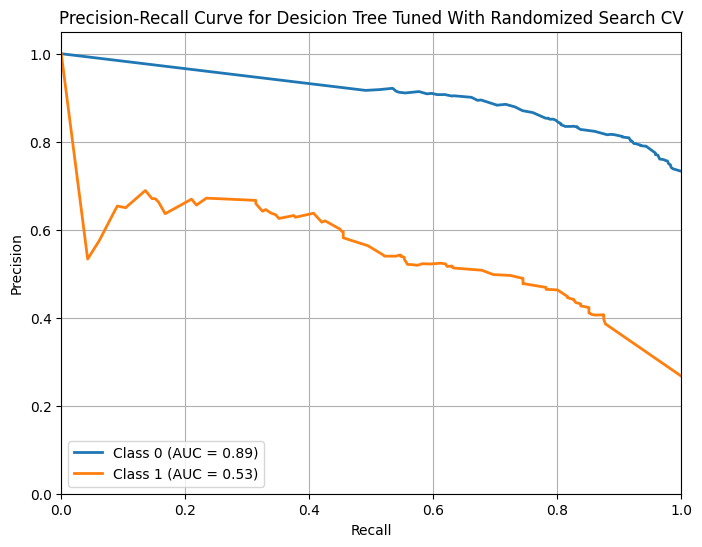

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model Tuned with Randomized Search CV

y_pred_tuned2 = randomSearch_model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(randomSearch_model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_tuned2[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred_tuned2[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree Tuned With Randomized Search CV')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

The Exploratory Data Analysis (EDA) and prediction modeling (decision tree) for churn prediction have provided several key insights. Firstly, it was observed that customers with shorter tenures tend to have higher churn rates, showing potential issues with early customer satisfaction or onboarding processes. Additionally, higher monthly charges are correlated with higher churn, suggesting that cost-sensitive customers may perceive the service as too expensive. Subscription to additional services such as Online Security, Tech Support, and Streaming Services is associated with lower churn rates, indicating that customers who engaged with more services are more likely to remain loyal. Contract type also plays a crucial role, with month-to-month contracts showing higher churn rates compared to one or two-year contracts, which provide more stability and incentives for customers to stay. Payment methods further influence churn, with customers using electronic check payments showing higher churn rates compared to those using credit cards or bank transfers, potentially reflecting differences in customer demographics or preferences.

For model perfomance, the Decision Tree model achieved an accuracy of 78%, with a higher precision (82%) and recall (91%) for predicting non-churners (class 0). However, the model's performance is less robust for predicting churners (class 1), with precision at 63% and recall at 44%. This imbalance shows that while the model is good at identifying customers who will stay, it is less effective at correctly identifying those who will leave.

Additionally, features such as tenure and total charges emerged as the most important predictors of churn, aligning with the EDA findings. The Decision Tree model achieved an overall accuracy of 78%, performing better at predicting non-churners than churners, indicating a need for improvement in identifying potential churners. This performance discrepancy highlights the necessity for additional data or model refinement. Overall, both intrinsic customer behaviors (like tenure and service usage) and external factors (like contract type and payment method) significantly influence churn. Addressing these areas through targeted strategies can enhance customer retention and reduce churn rates.